## Project Overview

For this project, I want to understand the hashtag and associated Twitter community of #AcademicTwitter. The goal for it will most likely be to understand and visualize how the hashtag usually is discussed, and finally where people go with the evolution of it over time.

## Dependencies

In [24]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.patches import Circle
import numpy as np

## Collection

I'll be using the TAGS system again, as I find it better than the normal Twitter API (probably due to my own incompetence).

In [6]:
df = pd.read_csv('AcademicTwitter.csv')
print(df.dtypes)

id_str                         int64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates              float64
user_lang                    float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str               int64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
user_location                 object
status_url                    object
entities_str                  object
dtype: object


## Processing

Since my data is already in a CSV format, I don't have to worry too much about this section. However, I'll still be utilizing a couple key types of data, so I might as well print them here for posterity's sake.

In [11]:
tdf = df[['from_user', 'user_location', 'text', 'user_followers_count']]
print(tdf)

            from_user                user_location  \
0      AdrianZidaritz            San Francisco, CA   
1     FeminismInIndia                        India   
2       damoncroberts                          NaN   
3          angela4_21                       México   
4        purling4peas                          NaN   
...               ...                          ...   
2965  ScientistRachel                          NaN   
2966     MxLysistrata  tongva to chochenyo ohlone    
2967    UBCGradSchool        Vancouver, BC, Canada   
2968         RSAposts                   Austin, TX   
2969   PatrciaMMarcos                          NaN   

                                                   text  user_followers_count  
0     RT @FeminismInIndia: From very early on, Dr Va...               12259.0  
1     From very early on, Dr Vaishnavi Ananthanaraya...               49386.0  
2     RT @FialaLenka: Morning reading when suddenly....                1083.0  
3     RT @LabSpiritu: Oportunid

## Analysis

I'll be mostly visualizing this data, so it's a little awkward to try to analyze it here in two different methods. I do have some ideas on how to do so, so I've listed them below.

"A lab near you" might be my favorite result from this, as it displays how nerdy a lot of these people are.

In [12]:
locs = tdf['user_location'].value_counts()
print(locs)

London, England                30
A lab near you                 30
United States                  25
Boston, MA                     24
New York, NY                   22
                               ..
London & Berlin                 1
Pittsburgh, PA, USA             1
Newcastle upon Tyne             1
Montclair, NJ                   1
tongva to chochenyo ohlone      1
Name: user_location, Length: 1192, dtype: int64


In [25]:
np.mean('user_followers_count')

TypeError: cannot perform reduce with flexible type

## Visualization

For visualizations, I'll be utilizing the mapping software we used previously, as well as some graphs to try to compare different elements of the data.

One portion that doesn't work quite yet is that I cannot average the numbers and still associate their location with it, which is something I think would look interest (albeit awful in graph form).

In [16]:
geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=.2)

def find_location(row):
    place = row['user_location']
    location = limited(place)
    
    if location != None:
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf

RateLimiter caught an error, retrying (0/2 tries). Called with (*('127.0.0.1',), **{}).
Traceback (most recent call last):
  File "C:\Users\inani\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\inani\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\inani\anaconda3\lib\http\client.py", line 1348, in getresponse
    response.begin()
  File "C:\Users\inani\anaconda3\lib\http\client.py", line 316, in begin
    version, status, reason = self._read_status()
  File "C:\Users\inani\anaconda3\lib\http\client.py", line 277, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\inani\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\inani\anaconda3\lib\ssl.py", line 1241, in recv_into
    return se

,from_user,user_location,text,user_followers_count,latitude,longitude
0,AdrianZidaritz,"San Francisco, CA","RT @FeminismInIndia: From very early on, Dr Va...",12259.0,37.779026,-122.419906
1,FeminismInIndia,India,"From very early on, Dr Vaishnavi Ananthanaraya...",49386.0,22.351115,78.667743
2,damoncroberts,NaN,RT @FialaLenka: Morning reading when suddenly....,1083.0,46.314475,11.048029
3,angela4_21,México,RT @LabSpiritu: Oportunidad de postdoc (CONACy...,446.0,23.553557,-102.267516
4,purling4peas,NaN,"RT @SwcTestimonial: ""I'm striking so that the ...",712.0,46.314475,11.048029
...,...,...,...,...,...,...
2965,ScientistRachel,NaN,RT @KarlZelik: Pro tip: When you send your PI ...,239.0,46.314475,11.048029
2966,MxLysistrata,tongva to chochenyo ohlone,i feel like if #academictwitter was as great a...,210.0,Not Found,Not Found
2967,UBCGradSchool,"Vancouver, BC, Canada",Join UBC: MASc Positions in Mechanical Enginee...,6926.0,49.260872,-123.113952
2968,RSAposts,"Austin, TX",RT @rsa_education: RSA is accepting applicatio...,1424.0,30.271129,-97.7437


In [18]:
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

In [19]:
tdf = tdf[tdf['latitude'] != 'Not Found']
tdf = tdf[tdf['longitude'] != 'Not Found']

lats = tdf['latitude']
longs = tdf['longitude']

print(lats)
print(longs)

0       37.779026
1       22.351115
2       46.314475
3       23.553557
4       46.314475
          ...    
2964    43.653482
2965    46.314475
2967    49.260872
2968    30.271129
2969    46.314475
Name: latitude, Length: 2677, dtype: object
0      -122.419906
1        78.667743
2        11.048029
3      -102.267516
4        11.048029
           ...    
2964    -79.383935
2965     11.048029
2967   -123.113952
2968      -97.7437
2969     11.048029
Name: longitude, Length: 2677, dtype: object


In [20]:
lats.index=range(0,len(lats))
longs.index=range(0,len(longs))

print(lats)

0       37.779026
1       22.351115
2       46.314475
3       23.553557
4       46.314475
          ...    
2672    43.653482
2673    46.314475
2674    49.260872
2675    30.271129
2676    46.314475
Name: latitude, Length: 2677, dtype: object


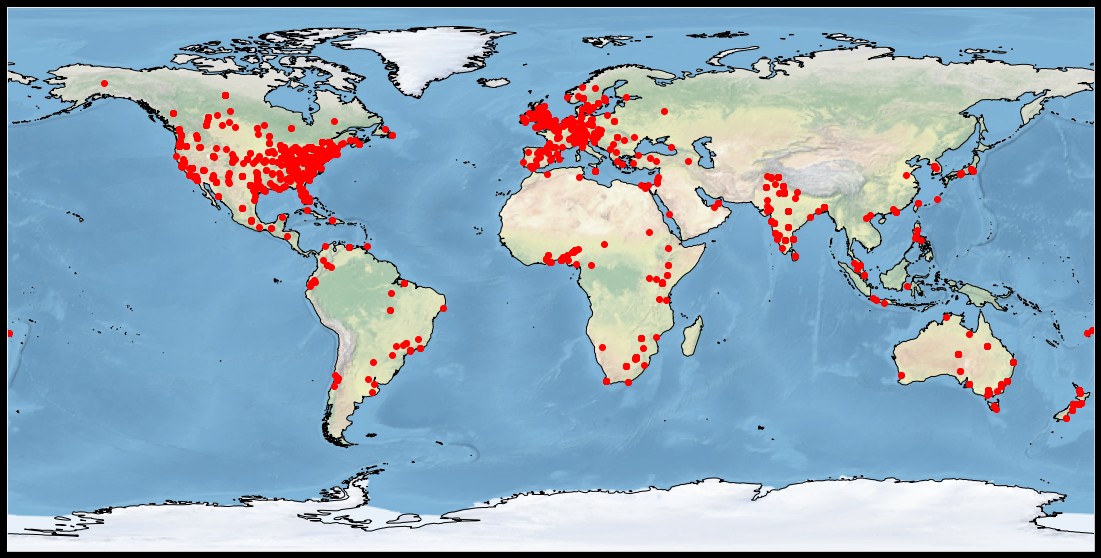

In [21]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                    
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()

In [26]:
FLocate = df.groupby('user_location/user_followers_count')
FLocate.plot(kind='bar')

KeyError: 'user_location/user_followers_count'